In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
# To enable plotting graphs in Jupyter notebook
import seaborn as sns

from sklearn.metrics import silhouette_score

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format
sns.set_style('whitegrid') 

In [4]:
#Load the file from local directory using pd.read_csv which is a special form of read_table
cc_df = pd.read_csv("Churn_Modelling.csv")
cc_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,"101,348.88",1
1,2,15647311,Hill,608,Spain,Female,41,1,"83,807.86",1,0,1,"112,542.58",0
2,3,15619304,Onio,502,France,Female,42,8,"159,660.80",3,1,0,"113,931.57",1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,"93,826.63",0
4,5,15737888,Mitchell,850,Spain,Female,43,2,"125,510.82",1,1,1,"79,084.10",0


In [5]:
cc_df.shape

(10000, 14)

In [6]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
cc_df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
##No need for RowNumber
cc_df = cc_df.drop(labels=['RowNumber','Surname'], axis =1)

In [9]:
cc_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerId,"10,000.00","15,690,940.57","71,936.19","15,565,701.00","15,628,528.25","15,690,738.00","15,753,233.75","15,815,690.00"
CreditScore,"10,000.00",650.53,96.65,350.00,584.00,652.00,718.00,850.00
Age,"10,000.00",38.92,10.49,18.00,32.00,37.00,44.00,92.00
Tenure,"10,000.00",5.01,2.89,0.00,3.00,5.00,7.00,10.00
Balance,"10,000.00","76,485.89","62,397.41",0.00,0.00,"97,198.54","127,644.24","250,898.09"
NumOfProducts,"10,000.00",1.53,0.58,1.00,1.00,1.00,2.00,4.00
HasCrCard,"10,000.00",0.71,0.46,0.00,0.00,1.00,1.00,1.00
IsActiveMember,"10,000.00",0.52,0.50,0.00,0.00,1.00,1.00,1.00
EstimatedSalary,"10,000.00","100,090.24","57,510.49",11.58,"51,002.11","100,193.91","149,388.25","199,992.48"
Exited,"10,000.00",0.20,0.40,0.00,0.00,0.00,0.00,1.00


In [10]:
## All Min max looks good and properly bounded

## duplicates for customer id ?
# Customer Key - should be unique - not part of analysis
multi_customer_key  = cc_df['CustomerId'].value_counts()
multi_customer_key[multi_customer_key> 1]

## so data seems to be in good shape

Series([], Name: CustomerId, dtype: int64)

In [11]:
col_category=['Geography','Gender','HasCrCard','IsActiveMember','NumOfProducts','Exited']
cols_numeric=['CreditScore','Age','Tenure','Balance','EstimatedSalary']

In [12]:
def analyse_cat(df, features):
    for feature in features:
        print(f'***   {feature}      ***')
        
        print( df[feature].value_counts())
        print( df[feature].unique())
        
        
        fig, ax1 = plt.subplots(1,1)
        sns.countplot(x=feature, data =  df , hue = 'Exited',ax= ax1)
        plt.title(feature)
        plt.show()
        yield   
        

feature_cat_analysis = iter(analyse_cat(cc_df,col_category ))

***   Geography      ***
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
['France' 'Spain' 'Germany']


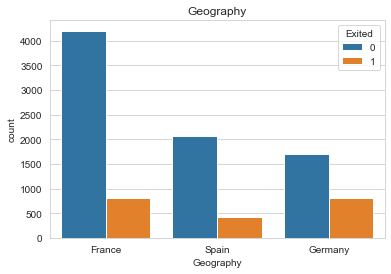

In [13]:
next(feature_cat_analysis)

***   Gender      ***
Male      5457
Female    4543
Name: Gender, dtype: int64
['Female' 'Male']


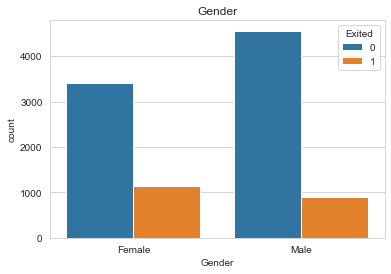

In [14]:
next(feature_cat_analysis)

***   HasCrCard      ***
1    7055
0    2945
Name: HasCrCard, dtype: int64
[1 0]


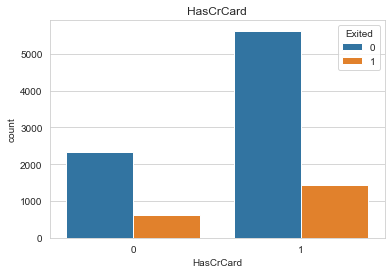

In [15]:
next(feature_cat_analysis)

***   IsActiveMember      ***
1    5151
0    4849
Name: IsActiveMember, dtype: int64
[1 0]


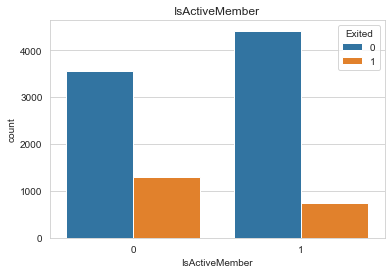

In [16]:
next(feature_cat_analysis)

***   NumOfProducts      ***
1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64
[1 3 2 4]


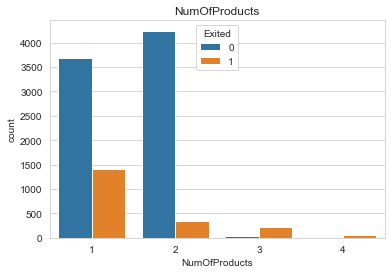

In [17]:
next(feature_cat_analysis)

***   Exited      ***
0    7963
1    2037
Name: Exited, dtype: int64
[1 0]


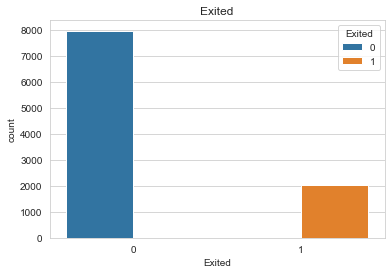

In [18]:
next(feature_cat_analysis)

In [19]:
## All teh categorical values look ok

In [20]:
def show_plots(df, features):
    for feature in features:
        print(f'***   {feature}      ***')
        print( df[feature].describe())
        fig, (ax1, ax2) = plt.subplots(1,2, figsize = (24, 6))
        sns.boxplot(df[feature], ax = ax1)
        plt.title(feature)
        # if feature in [ 'Avg_Credit_Limit','Total_Credit']:
        sns.distplot(df[feature], kde = True, ax= ax2, rug=True)
        plt.axvline(df[feature].mean(),linestyle="dashed",label="mean")
        plt.legend(loc="best")
        #else:
        #    sns.countplot(df[feature] ,ax= ax2)
        plt.title(feature)
        plt.show()
        yield

feature_num_analysis = iter(show_plots(cc_df,cols_numeric ))

***   CreditScore      ***
count   10,000.00
mean       650.53
std         96.65
min        350.00
25%        584.00
50%        652.00
75%        718.00
max        850.00
Name: CreditScore, dtype: float64


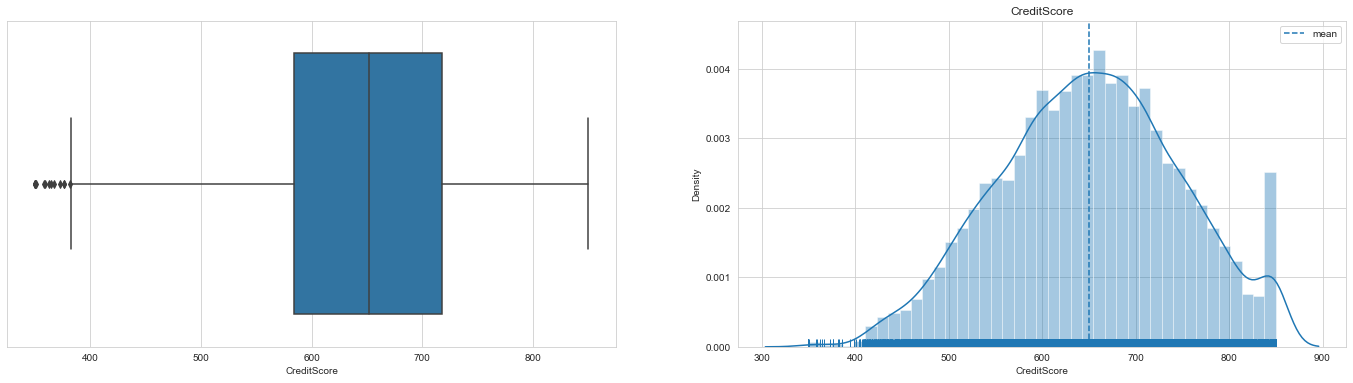

In [21]:
next(feature_num_analysis)

***   Age      ***
count   10,000.00
mean        38.92
std         10.49
min         18.00
25%         32.00
50%         37.00
75%         44.00
max         92.00
Name: Age, dtype: float64


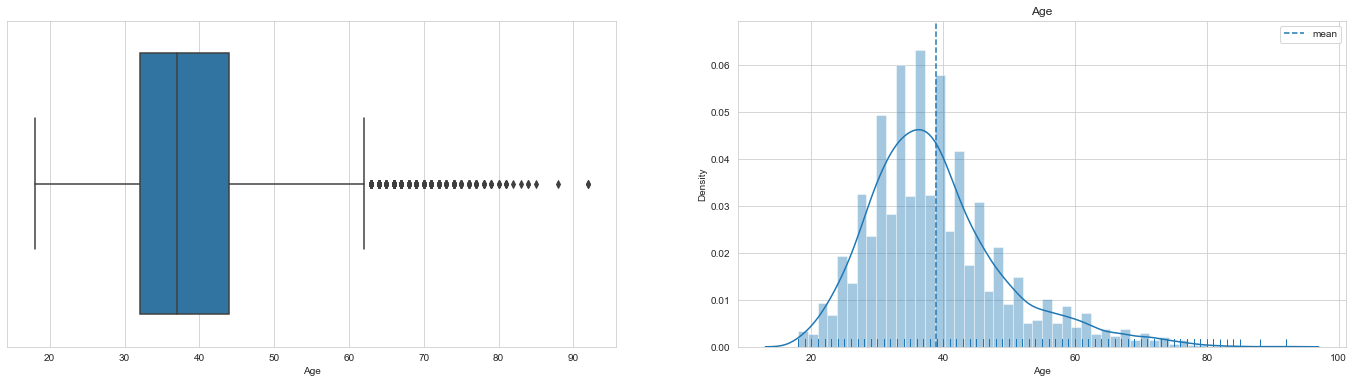

In [22]:
next(feature_num_analysis)

***   Tenure      ***
count   10,000.00
mean         5.01
std          2.89
min          0.00
25%          3.00
50%          5.00
75%          7.00
max         10.00
Name: Tenure, dtype: float64


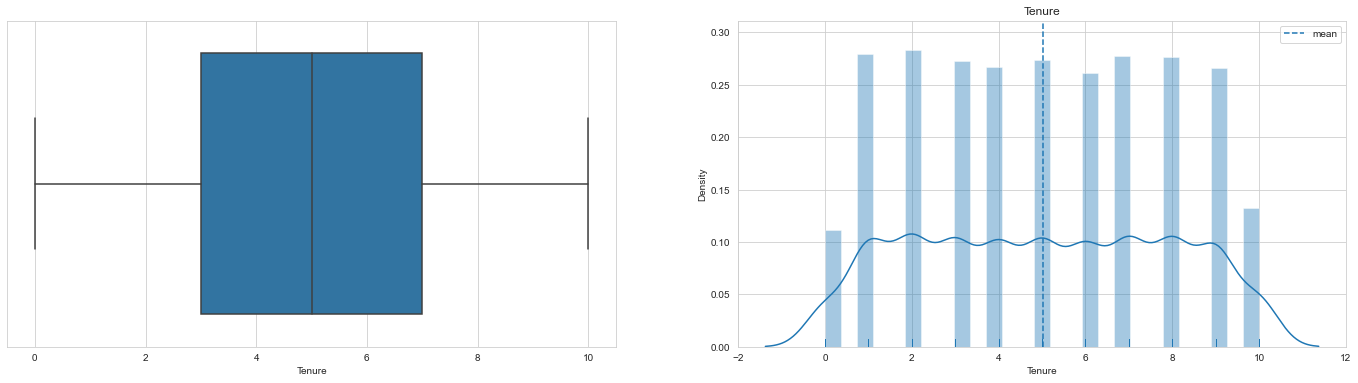

In [23]:
next(feature_num_analysis)

***   Balance      ***
count    10,000.00
mean     76,485.89
std      62,397.41
min           0.00
25%           0.00
50%      97,198.54
75%     127,644.24
max     250,898.09
Name: Balance, dtype: float64


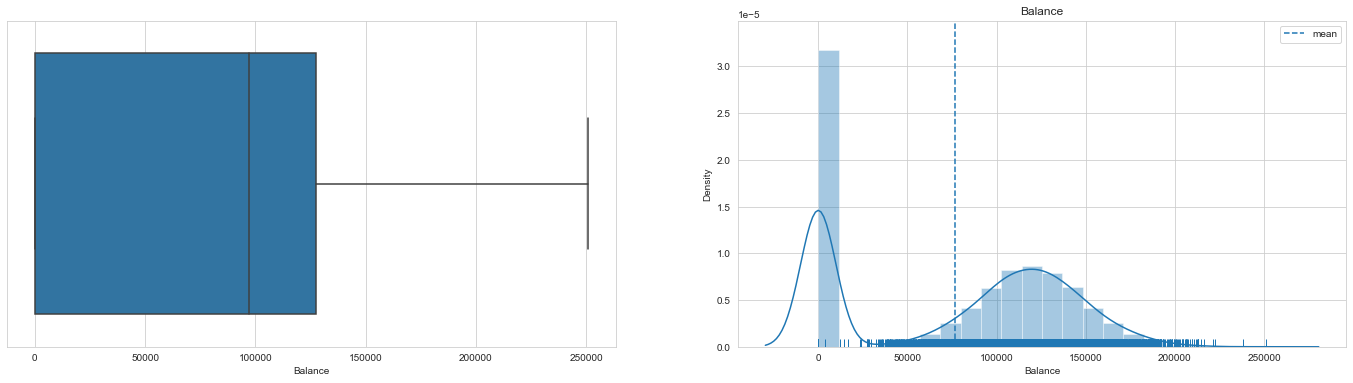

In [24]:
next(feature_num_analysis)

***   EstimatedSalary      ***
count    10,000.00
mean    100,090.24
std      57,510.49
min          11.58
25%      51,002.11
50%     100,193.91
75%     149,388.25
max     199,992.48
Name: EstimatedSalary, dtype: float64


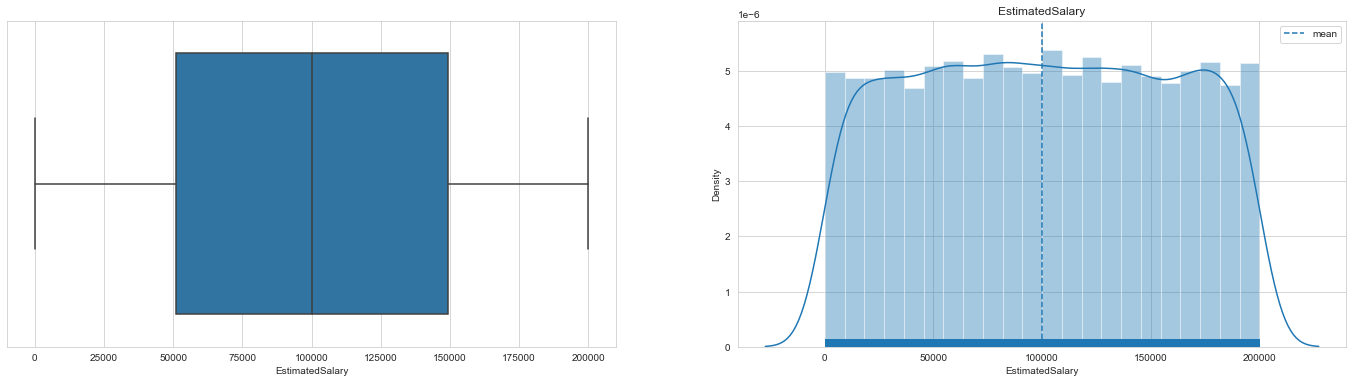

In [25]:
next(feature_num_analysis)

Credit Score : 
    Lots of outliers below the Media - IOR 
    Many customers with close to Max credit scores

Age, Tenor and Salary: seem to be well distributed

Number of products with 3 and 4 almost nothing 
    ' should we just have 1 product and more than 1 product?

Majority have low balances ---
    ' should we just modify to low and high balance?
    
We will evaluate salary more -> very evenly distributed

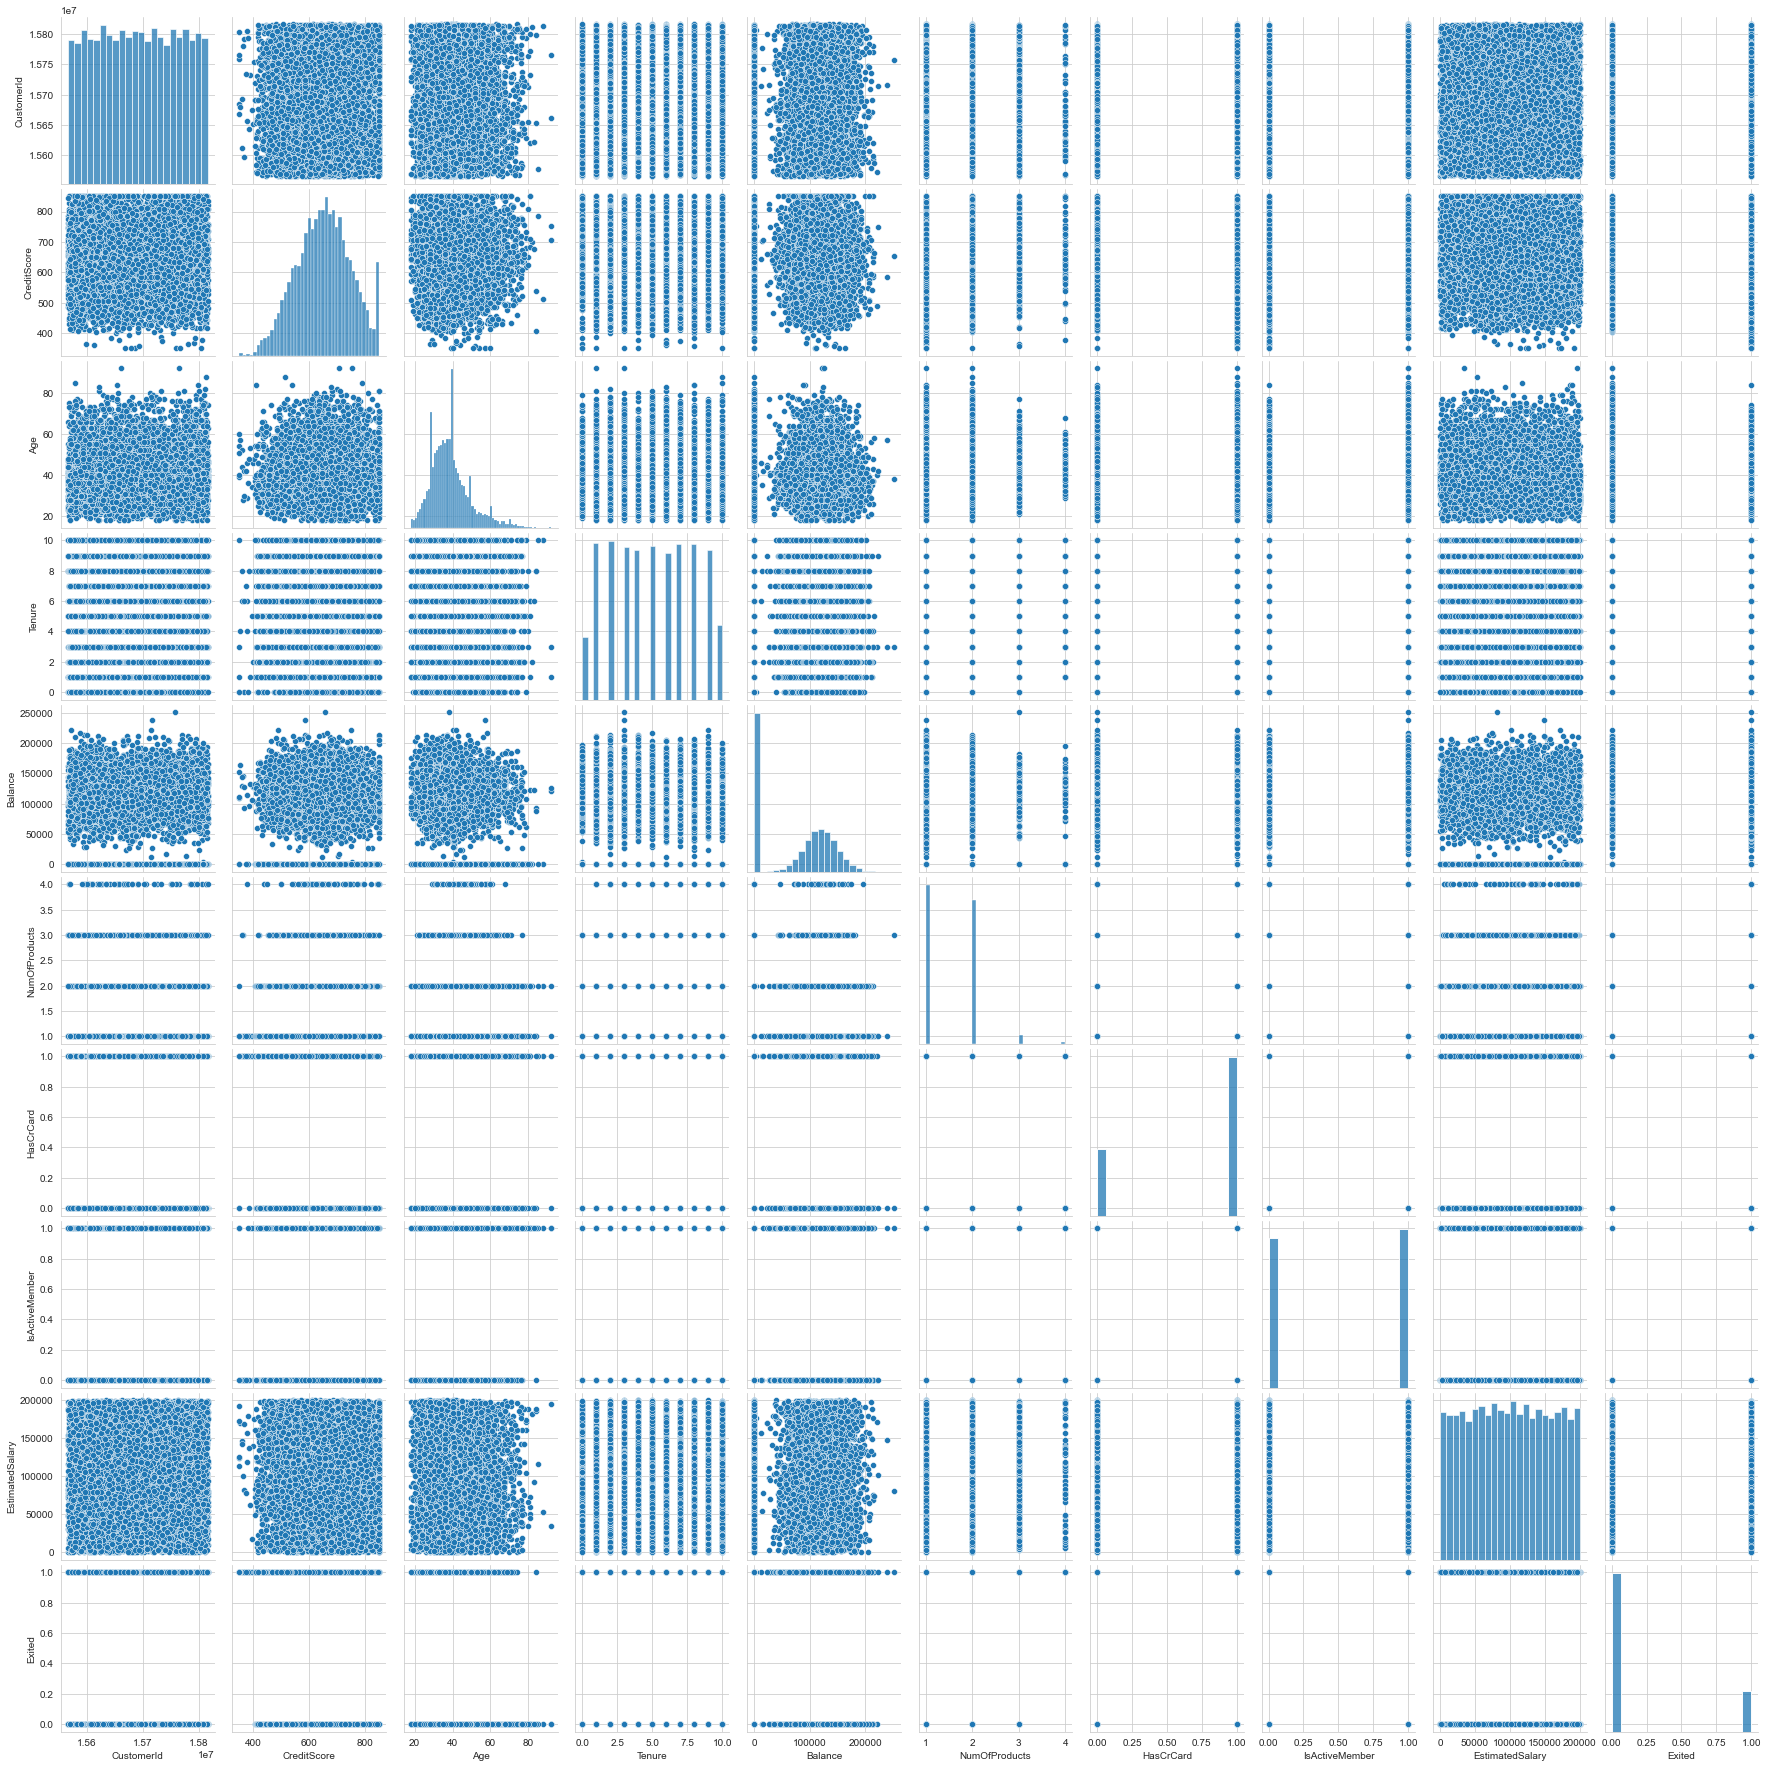

In [26]:
sns.pairplot(data=cc_df)

In [27]:
cc_df[cc_df['Exited']==1]['EstimatedSalary'].describe()

count     2,037.00
mean    101,465.68
std      57,912.42
min          11.58
25%      51,907.72
50%     102,460.84
75%     152,422.91
max     199,808.10
Name: EstimatedSalary, dtype: float64

In [28]:
cc_df[cc_df['Exited']==0]['EstimatedSalary'].describe()

## Salary distribution seems to be the same 

count     7,963.00
mean     99,738.39
std      57,405.59
min          90.07
25%      50,783.49
50%      99,645.04
75%     148,609.96
max     199,992.48
Name: EstimatedSalary, dtype: float64

<AxesSubplot:xlabel='NumOfProducts', ylabel='count'>

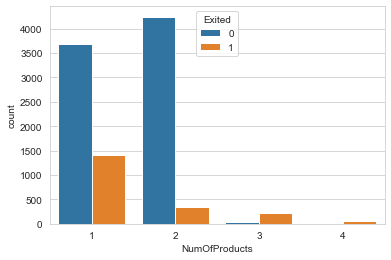

In [29]:
sns.countplot(x='NumOfProducts', data =  cc_df , hue = 'Exited')
## seems like NumOfProducts is a valid feature

In [45]:
cc_df.corr(method='kendall')

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,1.00,0.00,0.01,-0.01,-0.01,0.02,-0.01,0.00,0.01,-0.01
CreditScore,0.00,1.00,-0.01,0.00,0.00,0.01,-0.00,0.02,0.00,-0.02
Age,0.01,-0.01,1.00,-0.01,0.02,-0.05,-0.01,0.03,-0.00,0.27
Tenure,-0.01,0.00,-0.01,1.00,-0.01,0.01,0.02,-0.02,0.01,-0.01
Balance,-0.01,0.00,0.02,-0.01,1.00,-0.27,-0.01,-0.01,0.01,0.09
NumOfProducts,0.02,0.01,-0.05,0.01,-0.27,1.00,0.00,0.02,0.01,-0.12
HasCrCard,-0.01,-0.00,-0.01,0.02,-0.01,0.00,1.00,-0.01,-0.01,-0.01
IsActiveMember,0.00,0.02,0.03,-0.02,-0.01,0.02,-0.01,1.00,-0.01,-0.16
EstimatedSalary,0.01,0.00,-0.00,0.01,0.01,0.01,-0.01,-0.01,1.00,0.01
Exited,-0.01,-0.02,0.27,-0.01,0.09,-0.12,-0.01,-0.16,0.01,1.00


In [30]:
### we replace Geography and Gender and Number of Productswith categorical type
dummy_nop=pd.get_dummies(cc_df['NumOfProducts'],prefix='nop',drop_first=True)
dummy_gender = pd.get_dummies(cc_df['Gender'], prefix='gender',drop_first=True)
dummy_geo = pd.get_dummies(cc_df['Geography'],prefix = 'geo',drop_first=True)

In [31]:
bins =[300,579,669,739,799,850]
labels =['Bad','Fair','Good','Better','Exceptional']
dummy_credit_scores=pd.get_dummies( pd.cut(cc_df['CreditScore'],bins,labels=labels,right=False), prefix ='cs',drop_first=True)

In [32]:
# I did teh analysis with EstimatedSalary and found that it actually does not improve
cols=['HasCrCard','IsActiveMember','Exited','Balance','Age','Tenure'] #'EstimatedSalary'
new_df = pd.concat([cc_df[cols],dummy_nop,dummy_gender,dummy_geo,dummy_credit_scores],axis =1)

new_df.head()

,HasCrCard,IsActiveMember,Exited,Balance,Age,Tenure,nop_2,nop_3,nop_4,gender_Male,geo_Germany,geo_Spain,cs_Fair,cs_Good,cs_Better,cs_Exceptional
0,1,1,1,0.00,42,2,0,0,0,0,0,0,1,0,0,0
1,0,1,0,"83,807.86",41,1,0,0,0,0,0,1,1,0,0,0
2,1,0,1,"159,660.80",42,8,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0.00,39,1,1,0,0,0,0,0,0,1,0,0
4,1,1,0,"125,510.82",43,2,0,0,0,0,0,1,0,0,0,0


In [33]:
new_df.shape

(10000, 16)

In [34]:
#split data into train and test dataset
from sklearn.model_selection import train_test_split
y_data=new_df['Exited']
x_data = new_df.drop('Exited', axis =1 )

x_train,x_test,y_train,y_test = train_test_split( x_data,y_data,test_size=0.2,random_state=5)

x_train.head()

,HasCrCard,IsActiveMember,Balance,Age,Tenure,nop_2,nop_3,nop_4,gender_Male,geo_Germany,geo_Spain,cs_Fair,cs_Good,cs_Better,cs_Exceptional
7751,0,0,0.00,39,6,1,0,0,0,0,1,0,0,1,0
4154,1,0,0.00,34,3,1,0,0,1,0,0,0,1,0,0
3881,1,1,0.00,64,3,0,0,0,0,0,0,1,0,0,0
9238,1,0,0.00,50,4,1,0,0,0,0,0,0,0,1,0
5210,0,0,"129,717.30",35,7,1,0,0,1,0,0,0,0,0,0


In [35]:
from sklearn.preprocessing import StandardScaler

ncols = ['Balance','Tenure','Age']#'EstimatedSalary',
scaler =StandardScaler()
scaler.fit(x_train[ncols])
x_train[ncols]=scaler.fit_transform(x_train[ncols])
x_test[ncols]= scaler.transform( x_test[ncols])
x_train.head()

,HasCrCard,IsActiveMember,Balance,Age,Tenure,nop_2,nop_3,nop_4,gender_Male,geo_Germany,geo_Spain,cs_Fair,cs_Good,cs_Better,cs_Exceptional
7751,0,0,-1.23,0.01,0.35,1,0,0,0,0,1,0,0,1,0
4154,1,0,-1.23,-0.47,-0.69,1,0,0,1,0,0,0,1,0,0
3881,1,1,-1.23,2.39,-0.69,0,0,0,0,0,0,1,0,0,0
9238,1,0,-1.23,1.06,-0.34,1,0,0,0,0,0,0,0,1,0
5210,0,0,0.85,-0.37,0.70,1,0,0,1,0,0,0,0,0,0


In [36]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from sklearn.metrics import confusion_matrix, accuracy_score,f1_score, recall_score , precision_score


In [37]:


y_train =  np.array(y_train)
y_test =  np.array(y_test)

x_train =  np.array(x_train)
x_test =  np.array(x_test)



In [38]:
def create_display_model( hidden_layers ,optimizer , epochs , batch_size, activation ,label , x_train , y_train , x_test, y_test ):
    print (label)
    print(f'train:{x_train.shape}/{y_train.shape}   test:{x_test.shape}/{y_test.shape}')
    model = Sequential()
    
    model.add(tf.keras.Input(shape=(x_train.shape[1],))) 
    
    for i in range(len(hidden_layers)):
        model.add(Dense(hidden_layers[i], activation=activation))

    model.add(Dense(1,activation='sigmoid'))

    model.compile( loss='binary_crossentropy',optimizer=optimizer , metrics=['accuracy'])
    #print(model.summary())
    
    history = model.fit(x_train, y_train, epochs=epochs, validation_split = 0.2, verbose = False, batch_size = batch_size)
    hist  = pd.DataFrame(history.history)

    plt.plot(hist['loss'])
    plt.plot(hist['val_loss'])
    plt.legend(("train" , "valid") , loc =0)
    plt.show()

    y_test_preds=  model.predict(x_test)
    y_test_preds = (y_test_preds > 0.5)

    model_df=pd.DataFrame(data=[accuracy_score(y_test, y_test_preds), 
                       recall_score(y_test, y_test_preds), 
                       precision_score(y_test, y_test_preds),
                       f1_score(y_test, y_test_preds)], columns=['Basic DNN'],
                 index=["accuracy", "recall", "precision", "f1_score"])
    
    print(model_df.T)
    print(model.metrics_names)
    print(model.evaluate(x_test, y_test, verbose=0))


hidden_layers=[30]/Adam 0.0001/epochs=50/batch_size=200/activation=relu
train:(8000, 15)/(8000,)   test:(2000, 15)/(2000,)


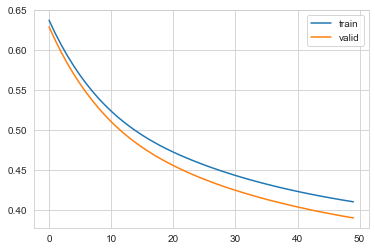

           accuracy  recall  precision  f1_score
Basic DNN      0.82    0.16       0.70      0.25
['loss', 'accuracy']
[0.4105824017524719, 0.8155]


In [39]:
# check batch size
hidden_layers =[30]
optimizer =tf.keras.optimizers.Adam(0.0001)  
epochs =50
batch_size =200  
activation ='relu' 
label = f'hidden_layers={hidden_layers}/Adam 0.0001/epochs={epochs}/batch_size={batch_size}/activation={activation}'
create_display_model( hidden_layers ,optimizer , epochs , batch_size, activation ,label , x_train , y_train , x_test, y_test)

hidden_layers=[30]/Adam 0.0001/epochs=50/batch_size=50/activation=relu
train:(8000, 15)/(8000,)   test:(2000, 15)/(2000,)


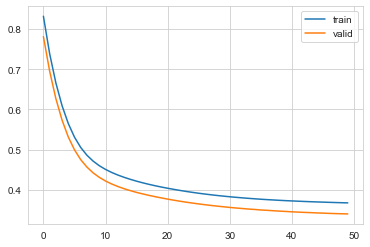

           accuracy  recall  precision  f1_score
Basic DNN      0.85    0.41       0.73      0.53
['loss', 'accuracy']
[0.3773507704734802, 0.8495]


In [40]:
# check batch size
hidden_layers =[30]
optimizer =tf.keras.optimizers.Adam(0.0001)  
epochs =50
batch_size =50 
activation ='relu' 
label = f'hidden_layers={hidden_layers}/Adam 0.0001/epochs={epochs}/batch_size={batch_size}/activation={activation}'
create_display_model( hidden_layers ,optimizer , epochs , batch_size, activation ,label , x_train , y_train , x_test, y_test)

hidden_layers=[30, 10]/Adam 0.0001/epochs=50/batch_size=50/activation=relu
train:(8000, 15)/(8000,)   test:(2000, 15)/(2000,)


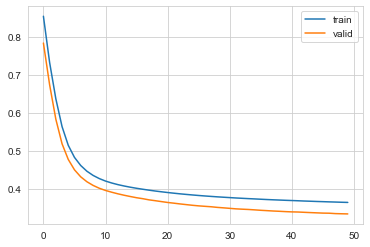

           accuracy  recall  precision  f1_score
Basic DNN      0.85    0.43       0.70      0.53
['loss', 'accuracy']
[0.3766300356388092, 0.8475]


In [41]:
#check layers
hidden_layers =[30,10]
optimizer =tf.keras.optimizers.Adam(0.0001)  
epochs =50
batch_size =50 
activation ='relu' 
label = f'hidden_layers={hidden_layers}/Adam 0.0001/epochs={epochs}/batch_size={batch_size}/activation={activation}'
create_display_model( hidden_layers ,optimizer , epochs , batch_size, activation ,label , x_train , y_train , x_test, y_test)

hidden_layers=[10, 10]/Adam 0.0001/epochs=50/batch_size=50/activation=relu
train:(8000, 15)/(8000,)   test:(2000, 15)/(2000,)


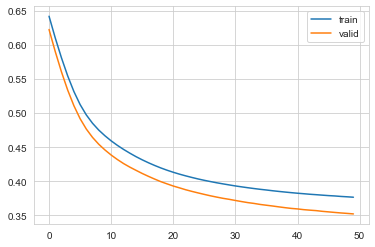

           accuracy  recall  precision  f1_score
Basic DNN      0.84    0.38       0.71      0.50
['loss', 'accuracy']
[0.3793035340309143, 0.8435]


In [42]:

hidden_layers =[10,10]
optimizer =tf.keras.optimizers.Adam(0.0001)  
epochs =50
batch_size =50 
activation ='relu' 
label = f'hidden_layers={hidden_layers}/Adam 0.0001/epochs={epochs}/batch_size={batch_size}/activation={activation}'
create_display_model( hidden_layers ,optimizer , epochs , batch_size, activation ,label , x_train , y_train , x_test, y_test)

hidden_layers=[30, 5]/Adam 0.0001/epochs=50/batch_size=50/activation=relu
train:(8000, 15)/(8000,)   test:(2000, 15)/(2000,)


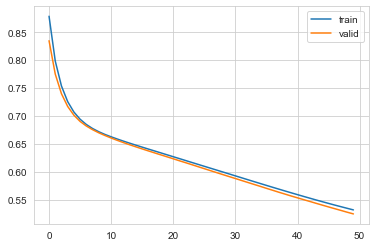

           accuracy  recall  precision  f1_score
Basic DNN      0.84    0.38       0.70      0.49
['loss', 'accuracy']
[0.5331635160446166, 0.8405]


In [43]:

hidden_layers =[30,5]
optimizer =tf.keras.optimizers.Adam(0.0001)  
epochs =50
batch_size =50 
activation ='relu' 
label = f'hidden_layers={hidden_layers}/Adam 0.0001/epochs={epochs}/batch_size={batch_size}/activation={activation}'
create_display_model( hidden_layers ,optimizer , epochs , batch_size, activation ,label , x_train , y_train , x_test, y_test)

hidden_layers=[30]/Adam 0.0001/epochs=100/batch_size=50/activation=relu
train:(8000, 15)/(8000,)   test:(2000, 15)/(2000,)


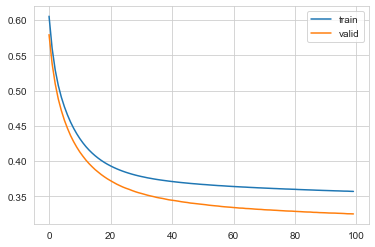

           accuracy  recall  precision  f1_score
Basic DNN      0.85    0.43       0.71      0.53
['loss', 'accuracy']
[0.36909122610092165, 0.849]


In [46]:
# As of now the most reasonable model we have is 
hidden_layers =[30]
optimizer =tf.keras.optimizers.Adam(0.0001)  
epochs =50
batch_size =50 
activation ='relu' 
label = f'hidden_layers={hidden_layers}/Adam 0.0001/epochs={epochs}/batch_size={batch_size}/activation={activation}'
create_display_model( hidden_layers ,optimizer , epochs , batch_size, activation ,label , x_train , y_train , x_test, y_test)